In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-28 12:36:37.639261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone6S_I dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone6S/iPhone6S_I/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.015625 -0.0234375j 0.015625 -0.0078125j 0.0390625+0.0078125j ...
 0.03125  -0.0078125j 0.015625 -0.015625j  0.03125  -0.0078125j]
2048
79002
(2048, 79002)
[0.02281539 0.01194811 0.00464875 ... 0.00215009 0.00434015 0.0120582 ]
0
(10000, 2048)
(10000,)
[0.015625 -0.0078125j 0.015625 -0.0078125j 0.       -0.0078125j ...
 0.0234375-0.015625j  0.       -0.0078125j 0.0078125-0.0078125j]
2048
83422
(2048, 83422)
[0.02261406 0.01221008 0.00356162 ... 0.00220496 0.00347677 0.01195692]
1
(20000, 2048)
(20000,)
[0.015625 -0.0234375j 0.015625 +0.j        0.015625 -0.015625j  ...
 0.015625 +0.0078125j 0.0078125-0.0234375j 0.015625 -0.0234375j]
2048
91947
(2048, 91947)
[0.02267564 0.01198972 0.00444621 ... 0.00256938 0.00477387 0.01187558]
2
(30000, 2048)
(30000,)
[0.0078125-0.03125j   0.0234375+0.0078125j 0.0234375-0.015625j  ...
 0.0078125-0.0234375j 0.0390625-0.0078125j 0.0390625-0.015625j ]
2048
91066
(2048, 91066)
[0.02257732 0.01187163 0.0045188  ... 0.00236705 0.0043952  0.01194121]
3
(40

## Cross-model Validation

## iPhone6S_I(ii) model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/iPHONE6S_I(ii)_model.h5")
model.summary()

2023-02-28 12:43:42.652936: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 6.3654 - accuracy: 0.1214
test loss, test acc: [6.365355491638184, 0.12138999998569489]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[1188   25  678 1557  549 2746    8  707 2459   83]
 [ 427    4  710  908   47 1949    9 2230 3706   10]
 [ 583    8  817  692   76 2278    5 1697 3829   15]
 [ 613    3  584  599  121 1694    8 1397 4965   16]
 [  68    2   53   17   10  434    8  259 9149    0]
 [ 192    1  204   68   35  888    7  431 8169    5]
 [  90 2054    5  180    9    8 7632    1    0   21]
 [1383  900 1051 3500  519 1256  246  647  281  217]
 [1462 1689 1005 3024  228 1710  241  293  132  216]
 [1121 2509  332 3748  182  970  754  142   20  222]]
              precision    recall  f1-score   support

           0       0.17      0.12      0.14     10000
           1       0.00      0.00      0.00     10000
           2       0.15      0.08      0.11     10000
           3       0.04      0.06      0.05     10000
           4       0.01      0.00      0.00     10000
           5       0.06      0.09      0.07     10000
           6       0.86      0.7

Test Accuracy:0.12139


Text(0.5, 1.0, 'Accuracy:0.121')

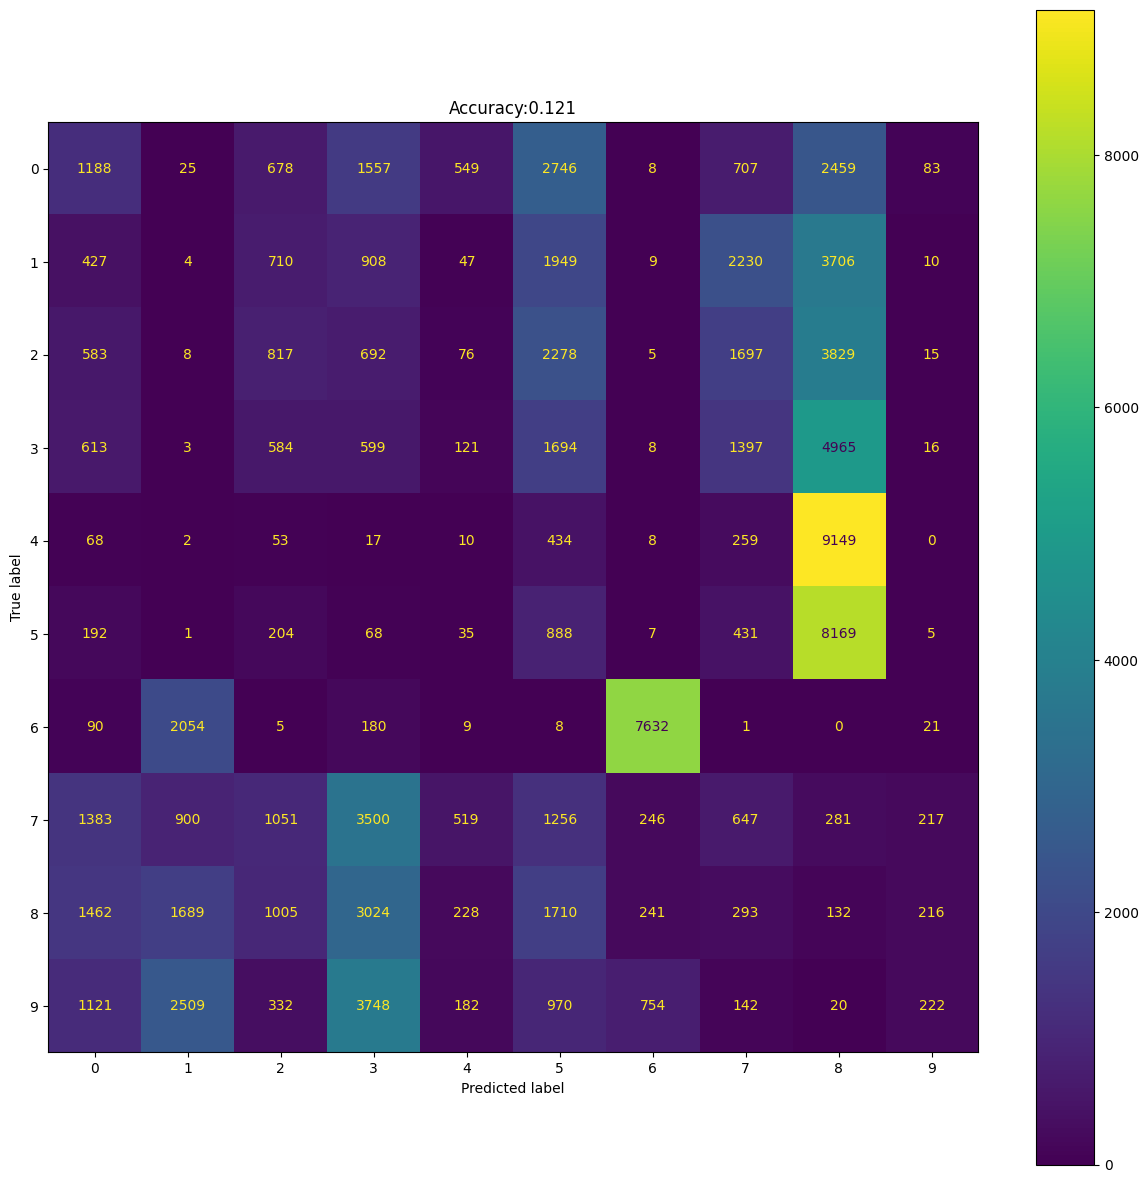

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.8290 - accuracy: 0.2741
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.6737 - accuracy: 0.3633
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.4215 - accuracy: 0.4090
Epoch 4/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.3417 - accuracy: 0.4374
Epoch 5/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.3077 - accuracy: 0.4524
Epoch 6/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.2884 - accuracy: 0.4620
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.2760 - accuracy: 0.4683
Epoch 8/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.2668 - accuracy: 0.4730
Epoch 9/30
3125/3125 [==============================] - 11s 4ms/step - loss: 1.2601 - accuracy: 0.4764
Epoch 10/30
3125/3125 [==============================] - 11s 4ms/step - l

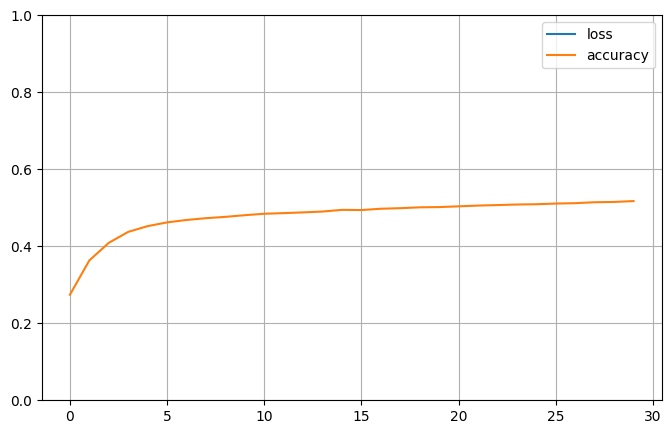

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 1.2014 - accuracy: 0.5166
test loss, test acc: [1.2014025449752808, 0.516569972038269]


In [12]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[5675  944  544  777   14  428   10 1210  362   36]
 [1515 4657 1025 1084  156 1135   10  341   69    8]
 [1927 2730 2202 1323  145 1288   10  303   68    4]
 [1811 1867  944 2720  228 2215   13  175   26    1]
 [  23  146   58  222 6273 3267   10    0    0    1]
 [ 232  457  325  896 2318 5761   10    1    0    0]
 [   0    0    0    0    0    0 9579   18   29  374]
 [1143  446  120   83    1   18  147 4771 1197 2074]
 [ 832   89   39    5    0    1  131 2348 3800 2755]
 [ 177   14    3    0    0    0  382 1707 1498 6219]]
              precision    recall  f1-score   support

           0       0.43      0.57      0.49     10000
           1       0.41      0.47      0.44     10000
           2       0.42      0.22      0.29     10000
           3       0.38      0.27      0.32     10000
           4       0.69      0.63      0.66     10000
           5       0.41      0.58      0.48     10000
           6       0.93      0.9

Test Accuracy:0.51657


Text(0.5, 1.0, 'Accuracy:0.517')

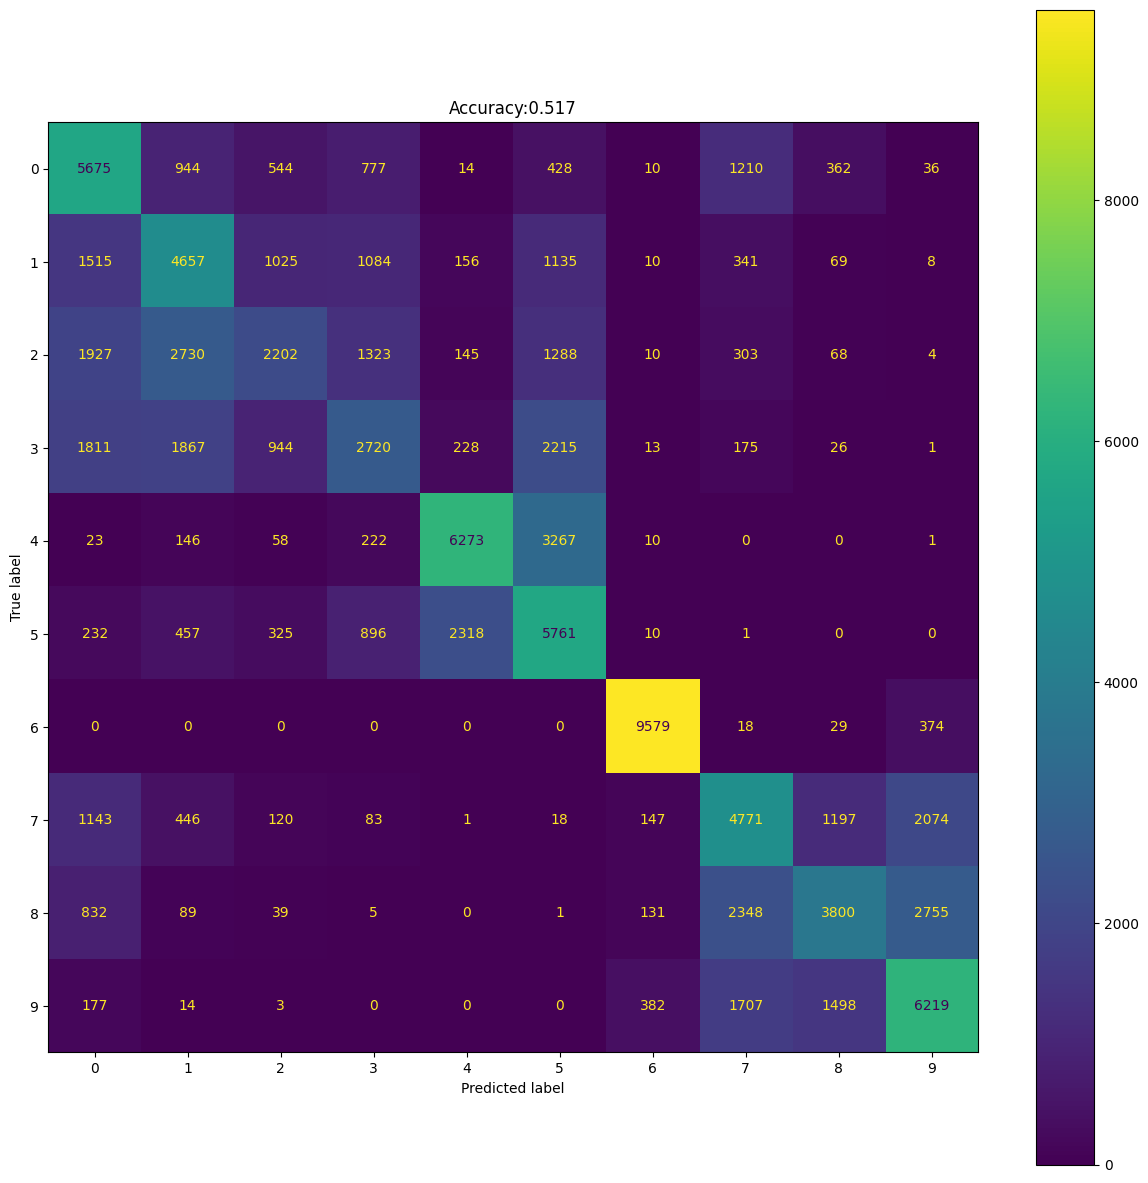

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I_BeSh model

Cross-model Validation without training

In [14]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/iPHONE6S_I_BeSh_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [15]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 5ms/step - loss: 11.1404 - accuracy: 0.1058
test loss, test acc: [11.140362739562988, 0.10582999885082245]


In [16]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[3219 2071 1299    0  324   16 1403 1668    0    0]
 [3709 1404 1057    0  252  133 2166 1278    1    0]
 [3373 1407  931    0  325   24 1572 2368    0    0]
 [3784 1766 1334    0  311   11 1260 1534    0    0]
 [5141 1666  794    0  542    5 1135  717    0    0]
 [4155 1814  488    0  119    2  638 2784    0    0]
 [ 499 3318 1097    0  270  479 2877 1460    0    0]
 [1907 3492 1166    0  760  341  717 1607    1    9]
 [2914 2655 1383    0  421  141 1681  804    0    1]
 [2334 2352 1200    0  240  190 1629 2054    0    1]]
              precision    recall  f1-score   support

           0       0.10      0.32      0.16     10000
           1       0.06      0.14      0.09     10000
           2       0.09      0.09      0.09     10000
           3       0.00      0.00      0.00     10000
           4       0.15      0.05      0.08     10000
           5       0.00      0.00      0.00     10000
           6       0.19      0.2

Test Accuracy:0.10583


Text(0.5, 1.0, 'Accuracy:0.106')

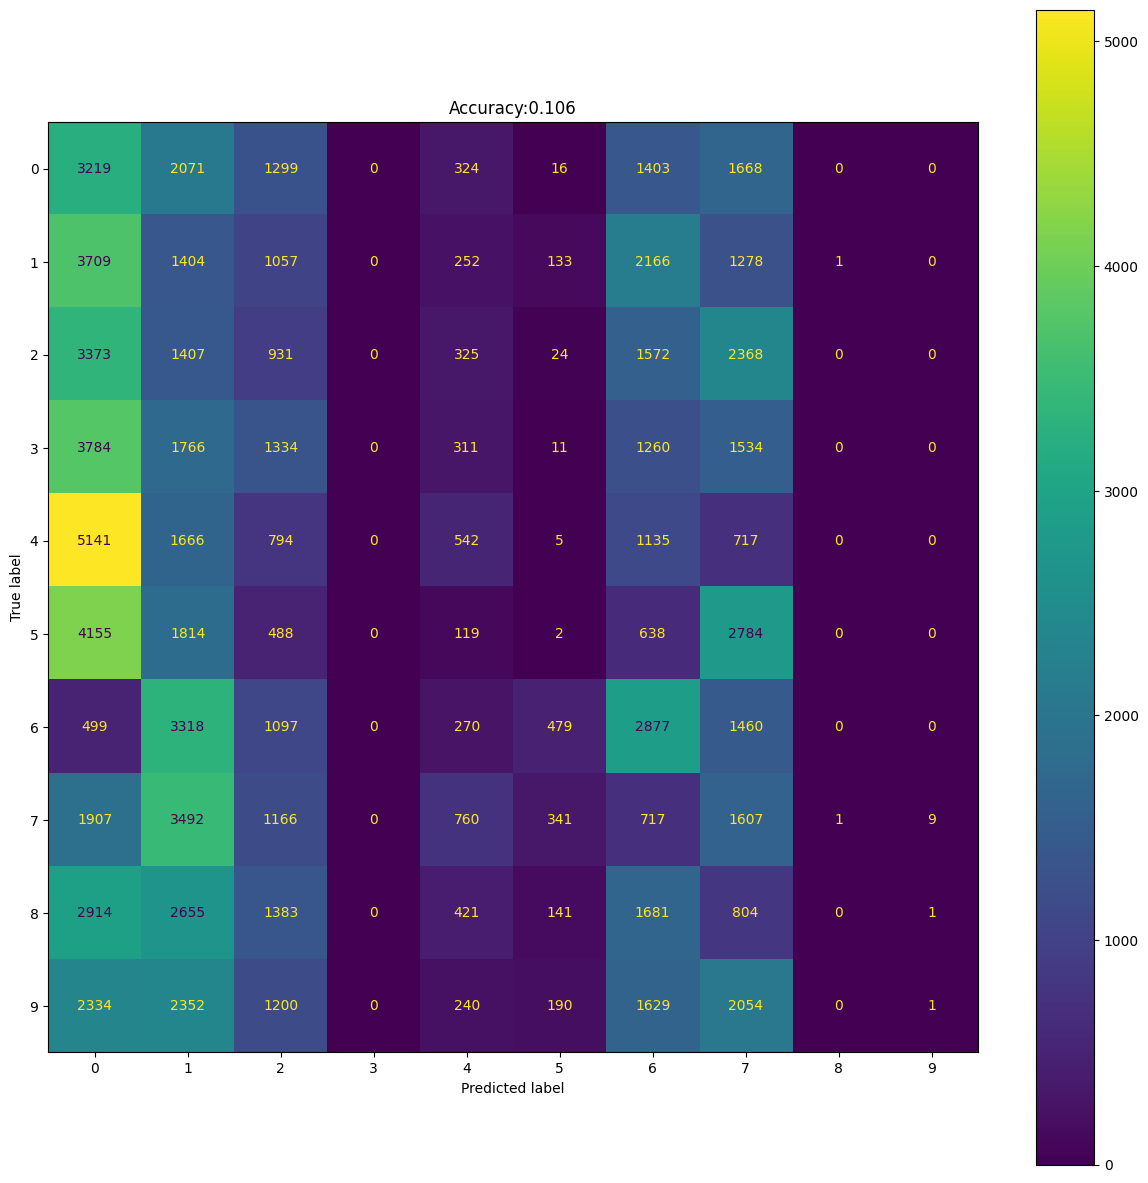

In [17]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [18]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 3.5709 - accuracy: 0.1231
Epoch 2/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.2658 - accuracy: 0.1989
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.0464 - accuracy: 0.2527
Epoch 4/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.9821 - accuracy: 0.2767
Epoch 5/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.9531 - accuracy: 0.2885
Epoch 6/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.9356 - accuracy: 0.2964
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.9229 - accuracy: 0.3011
Epoch 8/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.9126 - accuracy: 0.3049
Epoch 9/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.9037 - accuracy: 0.3092
Epoch 10/30
3125/3125 [==============================] - 11s 4ms/step - l

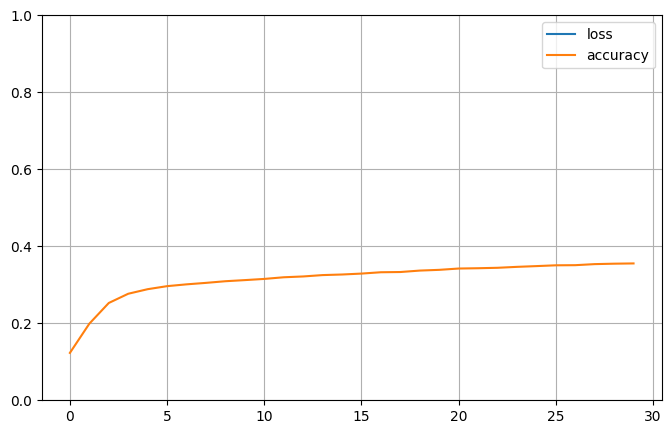

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 1.7875 - accuracy: 0.3624
test loss, test acc: [1.7875357866287231, 0.3624100089073181]


In [22]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[1234 1200  507 1133  998 1748  513  991 1254  422]
 [ 170 4485  477  899  681  679  781  617  905  306]
 [ 477 1828 1603  880  735 1505  682  761  983  546]
 [ 414 1628  396 2514 1426 1761  202  902  585  172]
 [ 221 1017  268 1385 4527 1604   41  445  465   27]
 [ 391  499  473 1043 1139 5459  109  477  230  180]
 [ 155  206   78   13   10   51 7825  287  747  628]
 [ 434 1168  165  550  532  917 1538 3537  837  322]
 [ 703 1296  391  381  518  472 1681  862 3060  636]
 [ 515 1079  559  292  121  575 2569  903 1390 1997]]
              precision    recall  f1-score   support

           0       0.26      0.12      0.17     10000
           1       0.31      0.45      0.37     10000
           2       0.33      0.16      0.21     10000
           3       0.28      0.25      0.26     10000
           4       0.42      0.45      0.44     10000
           5       0.37      0.55      0.44     10000
           6       0.49      0.7

Test Accuracy:0.36241


Text(0.5, 1.0, 'Accuracy:0.362')

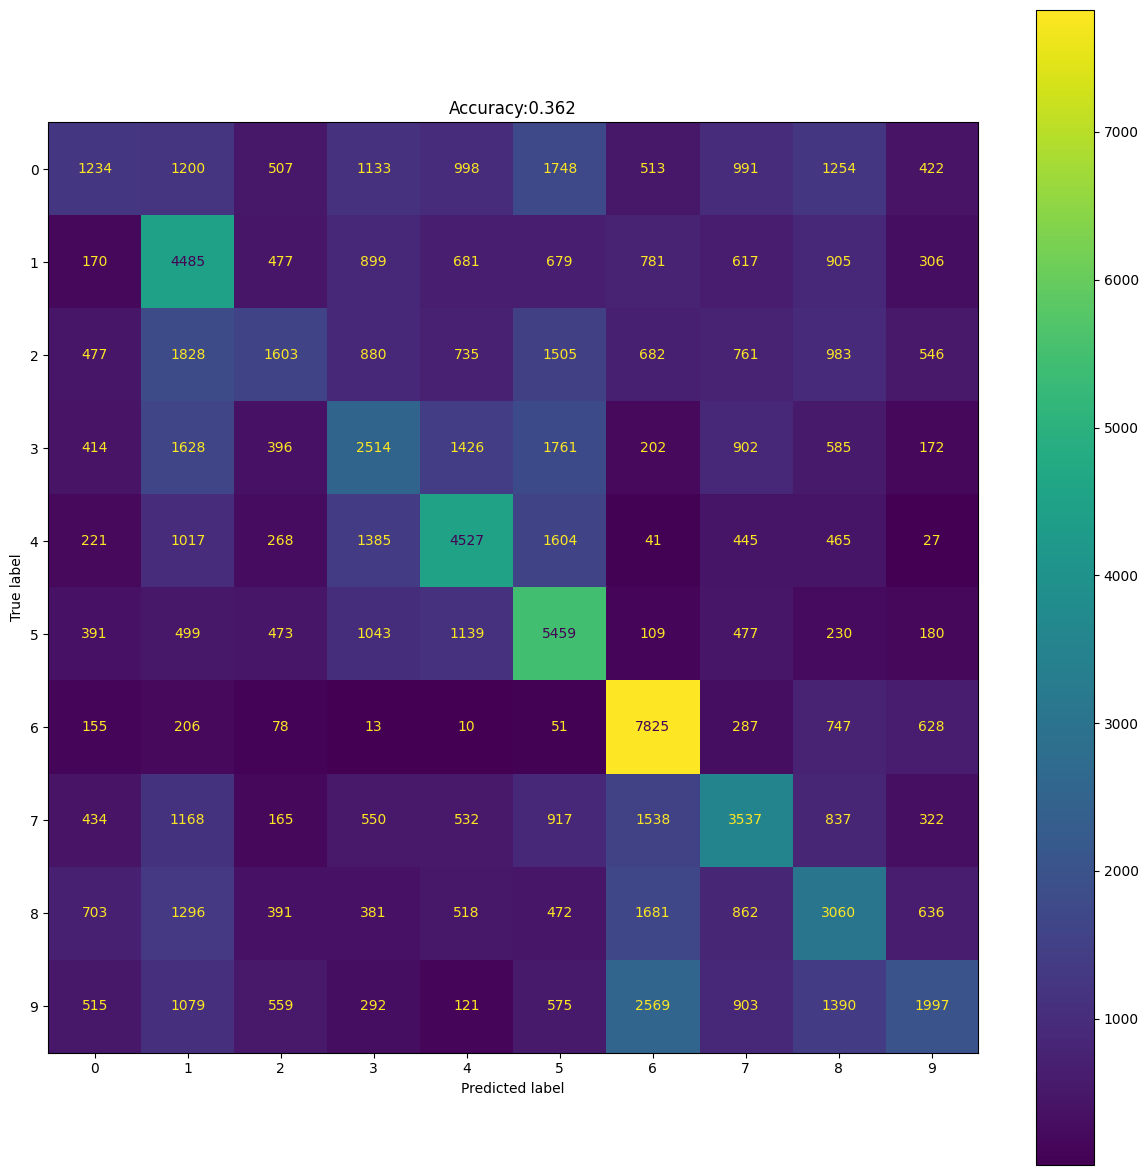

In [23]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')